# Создание алгоритма компенсации фазового набега в QAM сигналах

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle('/content/drive/MyDrive/Thesis/QAM_symbols_df.csv')

In [4]:
df.head(2)

,M,SNR,Phase_shift,QAM_symbols
1,4,50,0,"[(0.7014392993075365-0.6989112769319755j), (0...."
2,4,50,0,"[(-0.7067526946873619-0.6995223913305271j), (0..."


### Вычисление угла поворота по значениям с наибольшим модулем в 1-ой и 2-ой четверти

## `УЛУЧШИТЬ МЕТОД ЗА СЧЁТ ЛИНЕЙНОЙ РЕГРЕССИИ`

In [ ]:
def angle_corrector1(QAM_cons):
  
  max_1 = 0 + 0j
  max_2 = 0 + 0j

  for i in QAM_cons:
    if i.real >= 0 and i.imag >= 0:
      if abs(max_1) < abs(i):
        max_1 = i
    elif i.real < 0 and i.imag > 0:     
      if abs(max_2) < abs(i):
        max_2 = i

  tops = np.array([[max_1.real, max_1.imag],
                  [max_2.real, max_2.imag]])
  
  angle = np.arctan((tops[0][0] - tops[0][1])/(tops[1][0] - tops[1][1]))
  if angle < 0:
    angle = np.pi/2 + angle
  return tops, angle

In [ ]:
M = 4
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

%time angle_corrector1(test)

CPU times: user 5.96 ms, sys: 0 ns, total: 5.96 ms
Wall time: 5.98 ms


(array([[ 0.07011706,  0.99531203],
        [-0.9306339 ,  0.34800636]]), 0.6263749759750208)

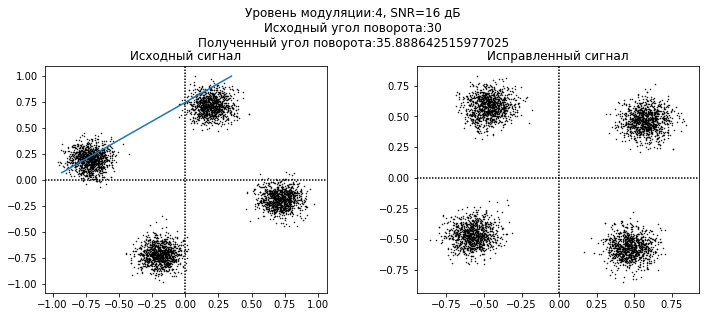

In [ ]:
M = 4
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector1(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

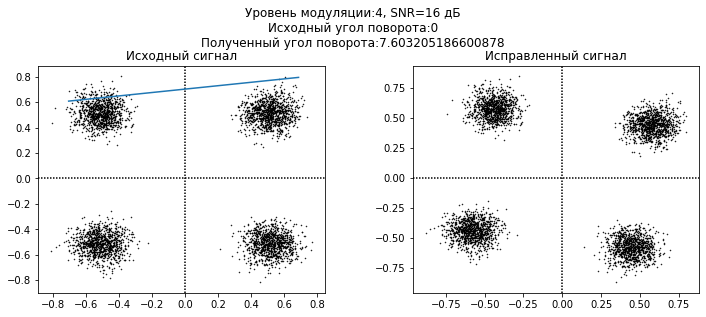

In [ ]:
M = 4
SNR = 16
Ph = 0
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector1(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

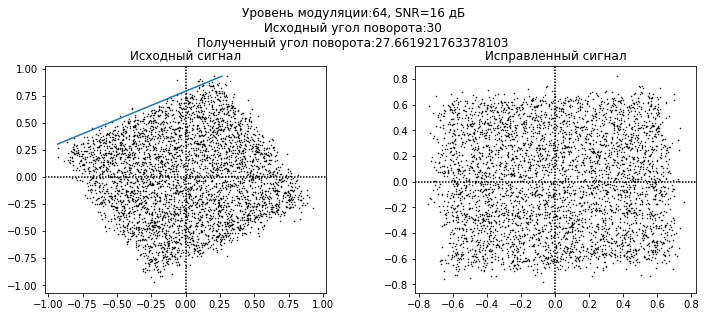

In [ ]:
M = 64
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector1(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

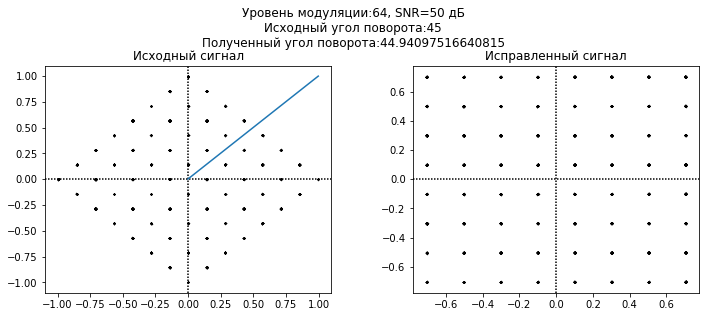

In [ ]:
M = 64
SNR = 50
Ph = 45

test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector1(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

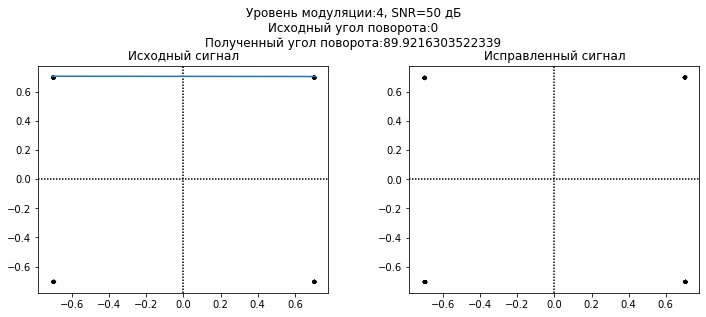

In [ ]:
M = 4
SNR = 50
Ph = 0
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector1(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

### Вычисление угла поворота по средним значениям

In [ ]:
def angle_corrector2(QAM_cons):

  quarter_1 = np.array([i for i in QAM_cons if i.real >= 0 and i.imag >= 0])
  quarter_2 = np.array([i for i in QAM_cons if i.real <= 0 and i.imag >= 0])

  tops = [[np.mean(quarter_1.real), np.mean(quarter_1.imag)], 
          [np.mean(quarter_2.real), np.mean(quarter_2.imag)]]

  ax1.plot(tops[1], tops[0])

  angle = np.arctan((tops[0][0] - tops[0][1])/(tops[1][0] - tops[1][1]))

  if angle < 0:
    angle = np.pi/2 + angle

  return tops, angle

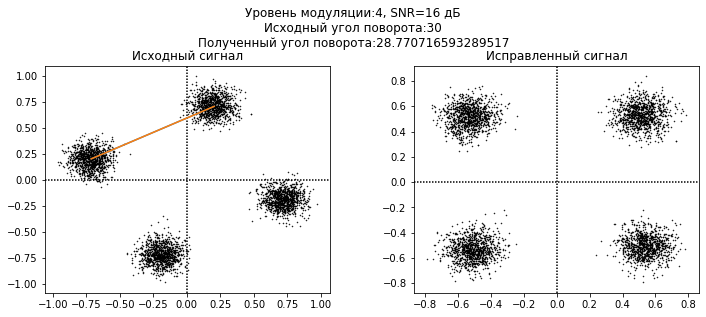

In [ ]:
M = 4
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector2(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

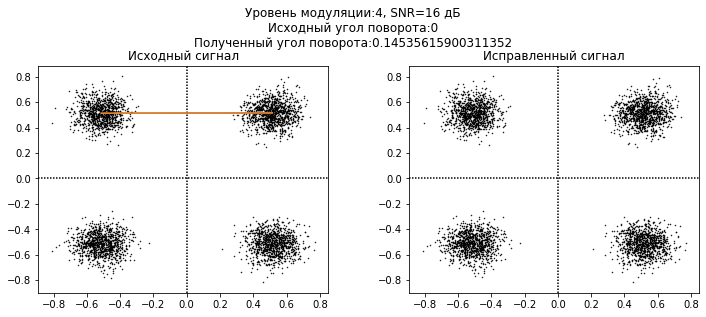

In [ ]:
M = 4
SNR = 16
Ph = 0
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector2(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

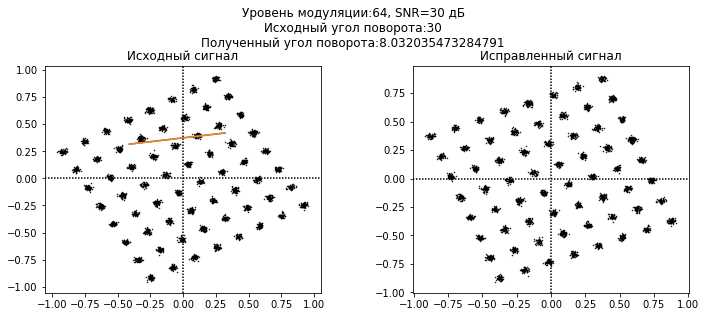

In [ ]:
M = 64
SNR = 30
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector2(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

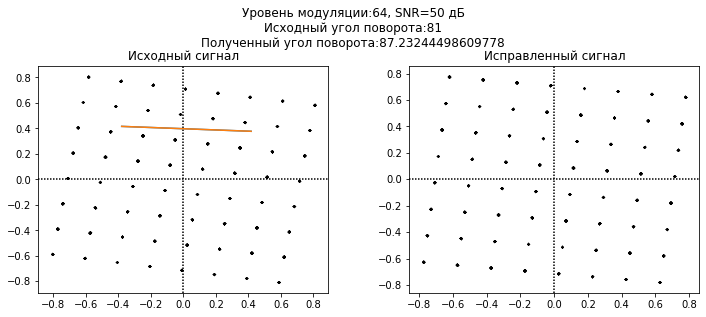

In [ ]:
M = 64
SNR = 50
Ph = 81
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector2(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

### Вычисление угла поворота по крайним значениям действительной и мнимой частей в четвертях

In [ ]:
def angle_corrector3(QAM_cons):

  max_1 = 0 + 0j
  max_2 = 0 + 0j

  for i in QAM_cons:
    if i.real >= 0 and i.imag >= 0:
      if max_1.imag < i.imag:
        max_1 = i
    elif i.real < 0 and i.imag > 0:     
      if max_2.real > i.real:
        max_2 = i

  tops = np.array([[max_1.real, max_1.imag],
                    [max_2.real, max_2.imag]])
    
  angle = np.arctan((tops[0][0] - tops[0][1])/(tops[1][0] - tops[1][1]))
  
  return tops, angle

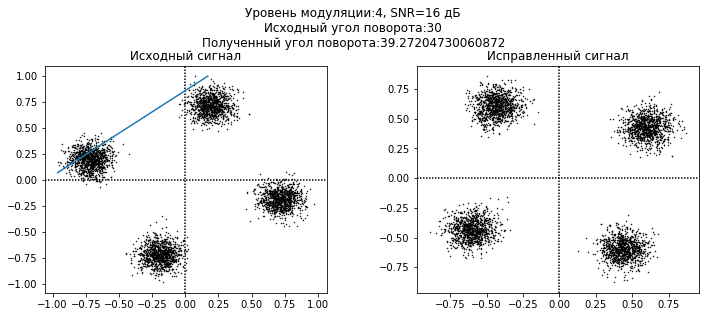

In [ ]:
M = 4
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector3(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

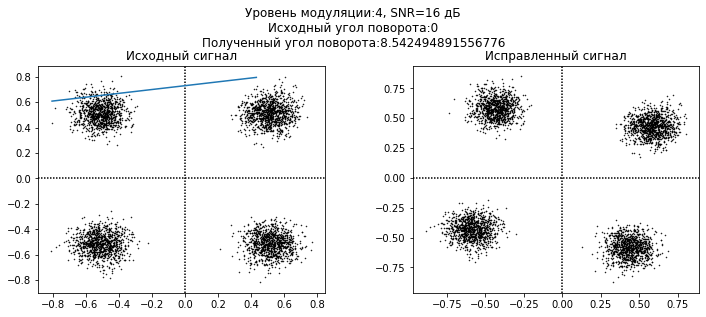

In [ ]:
M = 4
SNR = 16
Ph = 0
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector3(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

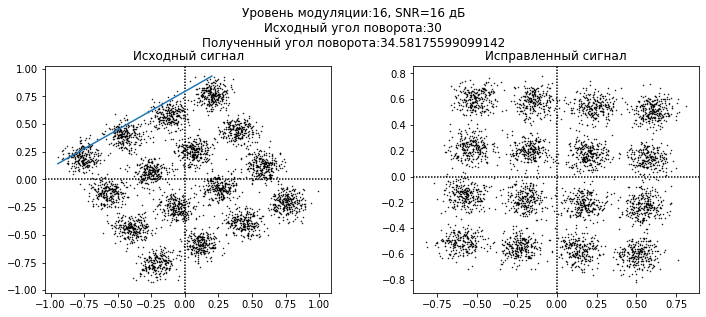

In [ ]:
M = 16
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector3(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

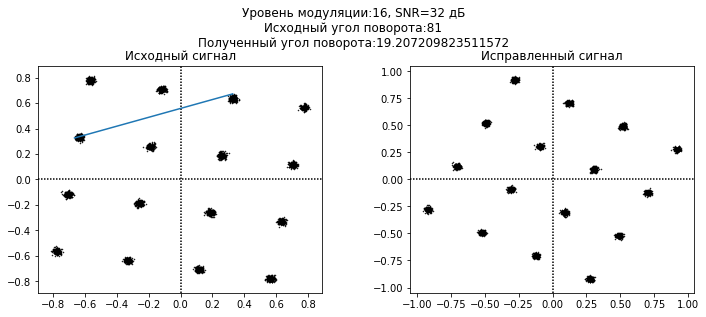

In [ ]:
M = 16
SNR = 32
Ph = 81
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

tops, angle = angle_corrector3(test)

ax1.plot(tops[1], tops[0])

test = test*np.exp(-angle*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle*180/np.pi}''')
fig.tight_layout(pad=5.0)

### ХЗ

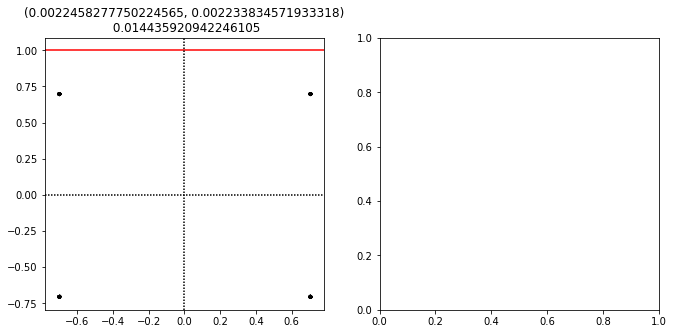

In [ ]:
M = 4
SNR = 50
Ph = 0
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)

first = []
second = []
for i in test:
  if i.real >= 0 and i.imag >= 0:
    first.append(1 - i.imag)
  elif i.real < 0 and i.imag > 0:
    second.append(1 - i.imag)

ax1.set_title(f'{np.std(first), np.std(second)}\n {np.amax(first)-np.amin(second)}')

ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax1.axhline(1, c='red')
ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

# tops, angle = angle_corrector3(test)

# ax1.plot(tops[1], tops[0])

# test = test*np.exp(-angle*1j)

# ax2.set_title('Исправленный сигнал')
# ax2.scatter(test.real, 
#             test.imag,
#             c='black',
#             marker='.',
#             s=1)
# ax2.axhline(0, c='black', dashes=(1, 1))
# ax2.axvline(0, c='black', dashes=(1, 1))
# fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
# Исходный угол поворота:{Ph}
# Полученный угол поворота:{angle*180/np.pi}''')
# fig.tight_layout(pad=5.0)

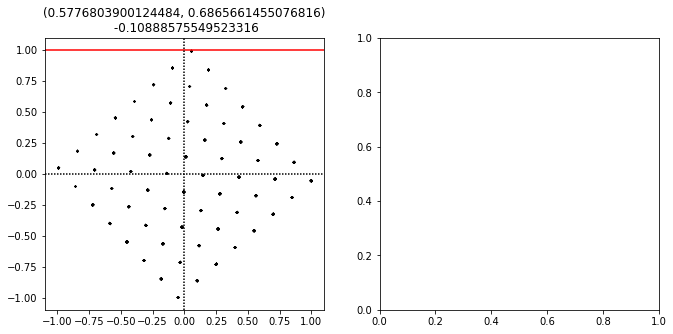

In [ ]:
M = 64
SNR = 50
Ph = 42
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)

first = []
second = []
for i in test:
  if i.real >= 0 and i.imag >= 0:
    first.append(1 - i.imag)
  elif i.real < 0 and i.imag > 0:
    second.append(1 - i.imag)

ax1.set_title(f'{np.mean(first), np.mean(second)}\n {np.mean(first)-np.mean(second)}')

ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax1.axhline(1, c='red')
ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

# tops, angle = angle_corrector3(test)

# ax1.plot(tops[1], tops[0])

# test = test*np.exp(-angle*1j)

# ax2.set_title('Исправленный сигнал')
# ax2.scatter(test.real, 
#             test.imag,
#             c='black',
#             marker='.',
#             s=1)
# ax2.axhline(0, c='black', dashes=(1, 1))
# ax2.axvline(0, c='black', dashes=(1, 1))
# fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
# Исходный угол поворота:{Ph}
# Полученный угол поворота:{angle*180/np.pi}''')
# fig.tight_layout(pad=5.0)

## Иследование признаков QAM сигнала на предмет корреляции с фазовым сдвигом

In [ ]:
corr_test = df[:]

In [ ]:
corr_test

,M,SNR,Phase_shift,QAM_symbols
1,4,50,0,"[(0.7014392993075365-0.6989112769319755j), (0...."
2,4,50,0,"[(-0.7067526946873619-0.6995223913305271j), (0..."
3,4,50,0,"[(-0.6996921958171798+0.7009840192354847j), (-..."
4,4,50,3,"[(-0.7398838731040926+0.664625874417456j), (0...."
5,4,50,3,"[(0.739909895597325-0.6611057921027184j), (0.6..."
...,...,...,...,...
12086,1024,0,87,"[(0.18522224139101126+0.15108979133587475j), (..."
12087,1024,0,87,"[(-0.22127741229059017+0.07121604374153466j), ..."
12088,1024,0,90,"[(-0.40020864490078795-0.18589912117816118j), ..."
12089,1024,0,90,"[(-0.3619966950003602+0.04947952938787332j), (..."


In [ ]:
from tqdm.notebook import tqdm 
q1_mean = []
q2_mean = []
q3_mean = []
q4_mean = []
q_mean = []

q1_angle_mean = []
q2_angle_mean = []
q3_angle_mean = []
q4_angle_mean = []
q_angle_mean = []

q1_max_real = []
q2_max_real = []
q3_max_real = []
q4_max_real = []

q1_min_real = []
q2_min_real = []
q3_min_real = []
q4_min_real = []

q1_max_imag = []
q2_max_imag = []
q3_max_imag = []
q4_max_imag = []

q1_min_imag = []
q2_min_imag = []
q3_min_imag = []
q4_min_imag = []

for qam in tqdm(corr_test.QAM_symbols):
  quarter_1 = np.array([i for i in qam if i.real >= 0 and i.imag >= 0])
  quarter_2 = np.array([i for i in qam if i.real < 0 and i.imag > 0])
  quarter_3 = np.array([i for i in qam if i.real < 0 and i.imag < 0])
  quarter_4 = np.array([i for i in qam if i.real > 0 and i.imag < 0])

  q1_mean.append(np.mean(np.abs(quarter_1)))
  q2_mean.append(np.mean(np.abs(quarter_2)))
  q3_mean.append(np.mean(np.abs(quarter_3)))
  q4_mean.append(np.mean(np.abs(quarter_4)))
  q_mean.append(np.mean(np.abs(qam)))

  q1_angle_mean.append(np.mean(np.angle(quarter_1)))
  q2_angle_mean.append(np.mean(np.angle(quarter_2)))
  q3_angle_mean.append(np.mean(np.angle(quarter_3)))
  q4_angle_mean.append(np.mean(np.angle(quarter_4)))
  q_angle_mean.append(np.mean(np.angle(qam)))

  q1_max_real.append(np.amax(quarter_1.real))
  q2_max_real.append(np.amax(quarter_2.real))
  q3_max_real.append(np.amax(quarter_3.real))
  q4_max_real.append(np.amax(quarter_4.real))

  q1_min_real.append(np.amin(quarter_1.real))
  q2_min_real.append(np.amin(quarter_2.real))
  q3_min_real.append(np.amin(quarter_3.real))
  q4_min_real.append(np.amin(quarter_4.real))

  q1_max_imag.append(np.amax(quarter_1.imag))
  q2_max_imag.append(np.amax(quarter_2.imag))
  q3_max_imag.append(np.amax(quarter_3.imag))
  q4_max_imag.append(np.amax(quarter_4.imag))

  q1_min_imag.append(np.amin(quarter_1.imag))
  q2_min_imag.append(np.amin(quarter_2.imag))
  q3_min_imag.append(np.amin(quarter_3.imag))
  q4_min_imag.append(np.amin(quarter_4.imag))


corr_test['q1_mean'] = q1_mean
corr_test['q2_mean'] = q2_mean
corr_test['q3_mean'] = q3_mean 
corr_test['q4_mean'] = q4_mean
corr_test['q_mean'] = q_mean

corr_test['q1_angle_mean'] = q1_angle_mean
corr_test['q2_angle_mean'] = q2_angle_mean
corr_test['q3_angle_mean'] = q3_angle_mean
corr_test['q4_angle_mean'] = q4_angle_mean
corr_test['q_angle_mean'] = q_angle_mean

corr_test['q1_max_real'] = q1_max_real 
corr_test['q2_max_real '] = q2_max_real 
corr_test['q2_max_real '] = q3_max_real 
corr_test['q4_max_real '] = q4_max_real 

corr_test['q1_min_real'] = q1_min_real 
corr_test['q2_min_real'] = q2_min_real 
corr_test['q3_min_real'] = q3_min_real 
corr_test['q4_min_real'] = q4_min_real 

corr_test['q1_max_imag '] = q1_max_imag 
corr_test['q2_max_imag '] = q2_max_imag 
corr_test['q3_max_imag '] = q3_max_imag 
corr_test['q4_max_imag '] = q4_max_imag 

corr_test['q1_min_imag '] = q1_min_imag 
corr_test['q2_min_imag '] = q2_min_imag 
corr_test['q3_min_imag'] = q3_min_imag 
corr_test['q4_min_imag'] = q4_min_imag

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
corr_test

,M,SNR,Phase_shift,QAM_symbols,q1_mean,q2_mean,q3_mean,q4_mean,q_mean,q1_angle_mean,q2_angle_mean,q3_angle_mean,q4_angle_mean,q_angle_mean,q1_max_real,q2_max_real,q4_max_real,q1_min_real,q2_min_real,q3_min_real,q4_min_real,q1_max_imag,q2_max_imag,q3_max_imag,q4_max_imag,q1_min_imag,q2_min_imag,q3_min_imag,q4_min_imag
1,4,50,0,"[(0.7014392993075365-0.6989112769319755j), (0....",0.991948,0.991927,0.991875,0.991775,0.991882,0.785439,2.356225,-2.356216,-0.785442,-0.016489,0.708205,-0.692976,0.707512,0.694456,-0.707806,-0.708533,0.695432,0.708016,0.708026,-0.693701,-0.692675,0.693590,0.692175,-0.709353,-0.708465
2,4,50,0,"[(-0.7067526946873619-0.6995223913305271j), (0...",0.991572,0.991625,0.991551,0.991515,0.991566,0.785381,2.356147,-2.356208,-0.785307,0.024547,0.708111,-0.694773,0.707857,0.693239,-0.707753,-0.708191,0.693595,0.707617,0.709000,-0.694802,-0.694111,0.693025,0.693687,-0.708534,-0.708760
3,4,50,0,"[(-0.6996921958171798+0.7009840192354847j), (-...",0.990803,0.990643,0.990741,0.990700,0.990722,0.785337,2.356098,-2.356229,-0.785378,-0.015383,0.708562,-0.693124,0.707046,0.692724,-0.709128,-0.708188,0.693144,0.707231,0.707679,-0.692980,-0.694035,0.693833,0.693351,-0.707922,-0.707561
4,4,50,3,"[(-0.7398838731040926+0.664625874417456j), (0....",0.992254,0.992406,0.992301,0.992305,0.992316,0.837953,2.408533,-2.303803,-0.733028,0.050498,0.670471,-0.656763,0.743974,0.658177,-0.745508,-0.670969,0.730884,0.745127,0.671495,-0.729616,-0.656709,0.729011,0.657793,-0.744960,-0.672325
5,4,50,3,"[(0.739909895597325-0.6611057921027184j), (0.6...",0.992430,0.992455,0.992365,0.992388,0.992410,0.837689,2.408526,-2.303813,-0.733175,0.082603,0.673175,-0.657391,0.744534,0.657853,-0.743865,-0.670857,0.730956,0.744749,0.670825,-0.731354,-0.656198,0.729857,0.656133,-0.744562,-0.672542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,1024,0,87,"[(0.18522224139101126+0.15108979133587475j), (...",0.331269,0.325726,0.333782,0.327165,0.329483,0.789662,2.367087,-2.371974,-0.763336,-0.018862,0.793544,-0.000082,0.760919,0.000177,-0.838937,-0.807026,0.000292,0.785580,0.843244,-0.000875,-0.000211,0.000072,0.000079,-0.804169,-0.823555
12087,1024,0,87,"[(-0.22127741229059017+0.07121604374153466j), ...",0.351634,0.352803,0.352538,0.351135,0.352044,0.791636,2.364168,-2.357792,-0.788298,0.021695,0.800030,-0.000430,0.813486,0.000244,-0.852550,-0.922539,0.000003,0.859576,0.888122,-0.000354,-0.000193,0.000305,0.000081,-0.932986,-0.926587
12088,1024,0,90,"[(-0.40020864490078795-0.18589912117816118j), ...",0.351611,0.349358,0.359572,0.350321,0.352778,0.796939,2.343168,-2.347652,-0.794835,-0.050036,0.932814,-0.000129,0.884351,0.000130,-0.827865,-0.805898,0.000564,0.814999,0.868979,-0.000077,-0.000011,0.000425,0.000461,-0.898005,-0.900886
12089,1024,0,90,"[(-0.3619966950003602+0.04947952938787332j), (...",0.332505,0.331690,0.317056,0.321689,0.325823,0.781542,2.343772,-2.354194,-0.781028,0.020405,0.790715,-0.000107,0.734866,0.000285,-0.809899,-0.782787,0.000070,0.918741,0.898688,-0.000557,-0.000566,0.000072,0.000539,-0.883490,-0.689715


In [ ]:
corr_test1 = corr_test.drop('QAM_symbols', axis=1)
corr_test1

,M,SNR,Phase_shift,q1_mean,q2_mean,q3_mean,q4_mean,q_mean,q1_angle_mean,q2_angle_mean,q3_angle_mean,q4_angle_mean,q_angle_mean,q1_max_real,q2_max_real,q4_max_real,q1_min_real,q2_min_real,q3_min_real,q4_min_real,q1_max_imag,q2_max_imag,q3_max_imag,q4_max_imag,q1_min_imag,q2_min_imag,q3_min_imag,q4_min_imag
1,4,50,0,0.991948,0.991927,0.991875,0.991775,0.991882,0.785439,2.356225,-2.356216,-0.785442,-0.016489,0.708205,-0.692976,0.707512,0.694456,-0.707806,-0.708533,0.695432,0.708016,0.708026,-0.693701,-0.692675,0.693590,0.692175,-0.709353,-0.708465
2,4,50,0,0.991572,0.991625,0.991551,0.991515,0.991566,0.785381,2.356147,-2.356208,-0.785307,0.024547,0.708111,-0.694773,0.707857,0.693239,-0.707753,-0.708191,0.693595,0.707617,0.709000,-0.694802,-0.694111,0.693025,0.693687,-0.708534,-0.708760
3,4,50,0,0.990803,0.990643,0.990741,0.990700,0.990722,0.785337,2.356098,-2.356229,-0.785378,-0.015383,0.708562,-0.693124,0.707046,0.692724,-0.709128,-0.708188,0.693144,0.707231,0.707679,-0.692980,-0.694035,0.693833,0.693351,-0.707922,-0.707561
4,4,50,3,0.992254,0.992406,0.992301,0.992305,0.992316,0.837953,2.408533,-2.303803,-0.733028,0.050498,0.670471,-0.656763,0.743974,0.658177,-0.745508,-0.670969,0.730884,0.745127,0.671495,-0.729616,-0.656709,0.729011,0.657793,-0.744960,-0.672325
5,4,50,3,0.992430,0.992455,0.992365,0.992388,0.992410,0.837689,2.408526,-2.303813,-0.733175,0.082603,0.673175,-0.657391,0.744534,0.657853,-0.743865,-0.670857,0.730956,0.744749,0.670825,-0.731354,-0.656198,0.729857,0.656133,-0.744562,-0.672542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,1024,0,87,0.331269,0.325726,0.333782,0.327165,0.329483,0.789662,2.367087,-2.371974,-0.763336,-0.018862,0.793544,-0.000082,0.760919,0.000177,-0.838937,-0.807026,0.000292,0.785580,0.843244,-0.000875,-0.000211,0.000072,0.000079,-0.804169,-0.823555
12087,1024,0,87,0.351634,0.352803,0.352538,0.351135,0.352044,0.791636,2.364168,-2.357792,-0.788298,0.021695,0.800030,-0.000430,0.813486,0.000244,-0.852550,-0.922539,0.000003,0.859576,0.888122,-0.000354,-0.000193,0.000305,0.000081,-0.932986,-0.926587
12088,1024,0,90,0.351611,0.349358,0.359572,0.350321,0.352778,0.796939,2.343168,-2.347652,-0.794835,-0.050036,0.932814,-0.000129,0.884351,0.000130,-0.827865,-0.805898,0.000564,0.814999,0.868979,-0.000077,-0.000011,0.000425,0.000461,-0.898005,-0.900886
12089,1024,0,90,0.332505,0.331690,0.317056,0.321689,0.325823,0.781542,2.343772,-2.354194,-0.781028,0.020405,0.790715,-0.000107,0.734866,0.000285,-0.809899,-0.782787,0.000070,0.918741,0.898688,-0.000557,-0.000566,0.000072,0.000539,-0.883490,-0.689715


In [ ]:
corr_test.corr()

,M,SNR,Phase_shift,q1_mean,q2_mean,q3_mean,q4_mean,q_mean,q1_angle_mean,q2_angle_mean,q3_angle_mean,q4_angle_mean,q_angle_mean,q1_max_real,q2_max_real,q4_max_real,q1_min_real,q2_min_real,q3_min_real,q4_min_real,q1_max_imag,q2_max_imag,q3_max_imag,q4_max_imag,q1_min_imag,q2_min_imag,q3_min_imag,q4_min_imag
M,1.000000e+00,-6.645954e-18,2.322001e-19,-0.334963,-0.334656,-0.334915,-0.334676,-0.334949,-0.001370,0.000014,-0.000385,0.001433,-0.002552,0.110004,0.269454,0.109012,-0.269318,-0.111334,-0.112000,-0.269068,0.112493,0.115391,0.268324,0.269443,-0.269640,-0.270221,-0.115378,-0.114624
SNR,-6.645954e-18,1.000000e+00,0.000000e+00,0.642499,0.642728,0.642536,0.642434,0.642840,0.000022,0.001431,-0.000554,-0.001054,-0.000897,-0.146462,-0.304588,-0.145991,0.303769,0.140545,0.145481,0.304444,-0.142564,-0.141867,-0.304592,-0.304156,0.303973,0.303721,0.139584,0.142925
Phase_shift,2.322001e-19,0.000000e+00,1.000000e+00,0.000184,0.000676,0.000858,0.000479,0.000547,-0.407576,-0.407458,-0.408689,-0.408649,-0.404709,0.366079,-0.107273,-0.367252,0.107410,0.364433,-0.369758,-0.106983,-0.368468,0.370253,0.106633,-0.106473,-0.107452,0.108724,0.364892,-0.369347
q1_mean,-3.349632e-01,6.424987e-01,1.844229e-04,1.000000,0.998798,0.998770,0.998764,0.999537,0.001251,0.001437,0.000226,-0.000188,-0.000233,-0.313513,-0.740155,-0.309240,0.739838,0.307280,0.308405,0.739816,-0.306072,-0.307457,-0.738623,-0.740078,0.740741,0.740879,0.305432,0.308020
q2_mean,-3.346562e-01,6.427281e-01,6.763805e-04,0.998798,1.000000,0.998796,0.998805,0.999553,0.000933,0.001101,-0.000030,-0.000464,-0.000453,-0.313797,-0.740185,-0.309514,0.739847,0.307327,0.308492,0.739683,-0.306761,-0.307073,-0.738488,-0.740097,0.740566,0.740913,0.305734,0.307821
q3_mean,-3.349146e-01,6.425357e-01,8.580023e-04,0.998770,0.998796,1.000000,0.998804,0.999546,0.000767,0.000982,-0.000164,-0.000623,-0.000760,-0.313740,-0.740353,-0.309712,0.739999,0.307752,0.308143,0.739842,-0.307093,-0.307424,-0.738607,-0.740250,0.740713,0.741029,0.305606,0.307940
q4_mean,-3.346756e-01,6.424340e-01,4.788662e-04,0.998764,0.998805,0.998804,1.000000,0.999547,0.000876,0.001063,-0.000130,-0.000549,-0.000555,-0.313374,-0.740331,-0.308967,0.739985,0.307346,0.307991,0.739682,-0.306412,-0.306954,-0.738489,-0.740177,0.740566,0.741004,0.305450,0.306893
q_mean,-3.349488e-01,6.428396e-01,5.474744e-04,0.999537,0.999553,0.999546,0.999547,1.000000,0.000956,0.001146,-0.000025,-0.000458,-0.000502,-0.313746,-0.740592,-0.309499,0.740253,0.307564,0.308396,0.740092,-0.306723,-0.307365,-0.738887,-0.740486,0.740983,0.741292,0.305694,0.307806
q1_angle_mean,-1.370225e-03,2.246695e-05,-4.075755e-01,0.001251,0.000933,0.000767,0.000876,0.000956,1.000000,0.994542,0.994576,0.994687,0.986075,-0.674034,0.375346,0.673829,-0.374534,-0.677129,0.669794,0.375780,0.673618,-0.670919,-0.370406,0.375323,0.378807,-0.379907,-0.675027,0.672059
q2_angle_mean,1.440900e-05,1.430663e-03,-4.074580e-01,0.001437,0.001101,0.000982,0.001063,0.001146,0.994542,1.000000,0.994348,0.994507,0.986389,-0.673659,0.375590,0.673579,-0.374694,-0.676606,0.669939,0.375467,0.672772,-0.671059,-0.370095,0.375525,0.378428,-0.380160,-0.674838,0.672290


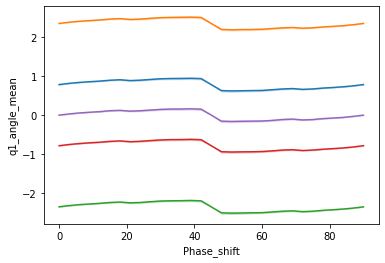

In [ ]:
sns.lineplot(x='Phase_shift', 
                y='q1_angle_mean',
                data=corr_test1)
sns.lineplot(x='Phase_shift', 
                y='q2_angle_mean',
                data=corr_test1)
sns.lineplot(x='Phase_shift', 
                y='q3_angle_mean',
                data=corr_test1)
sns.lineplot(x='Phase_shift', 
                y='q4_angle_mean',
                data=corr_test1)
sns.lineplot(x='Phase_shift', 
                y='q_angle_mean',
                data=corr_test1)

In [ ]:
z = np.polyfit(corr_test1.Phase_shift, corr_test1.q1_angle_mean, deg=18)
z

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([-5.95091050e-29,  3.48333461e-26, -8.27691255e-24,  9.33298937e-22,
       -2.78135640e-20, -5.04705617e-18,  5.41648685e-16,  4.03488488e-15,
       -4.81019075e-12,  4.71137077e-10, -2.54830049e-08,  8.90363395e-07,
       -2.08733588e-05,  3.27371865e-04, -3.33045928e-03,  2.06063795e-02,
       -6.85713092e-02,  1.00099145e-01,  7.84348123e-01])

In [ ]:
p = np.poly1d(z)

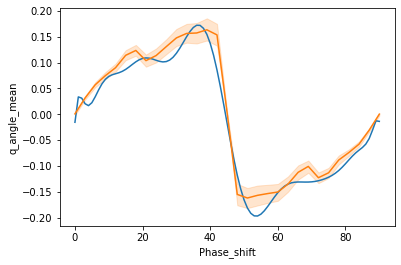

In [ ]:
sns.lineplot(x=np.arange(0, 91, 1), 
                y=p(np.arange(0, 91, 1)) - 0.8)
sns.lineplot(x='Phase_shift', 
                y='q_angle_mean',
                data=corr_test1)

In [ ]:
table = pd.Series(data=p(np.arange(0, 91, 0.001)) - 0.8, index=np.arange(0, 91, 0.001))
table

0.000    -0.015652
0.001    -0.015552
0.002    -0.015452
0.003    -0.015352
0.004    -0.015253
            ...   
90.995   -0.090432
90.996   -0.090582
90.997   -0.090731
90.998   -0.090880
90.999   -0.091030
Length: 91000, dtype: float64

In [ ]:
phase_means = corr_test1[['Phase_shift', 'q_angle_mean']].groupby('Phase_shift', as_index=False).mean()

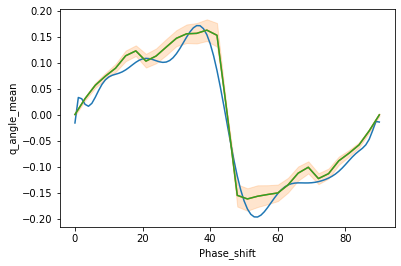

In [ ]:
sns.lineplot(x=np.arange(0, 91, 1), 
                y=p(np.arange(0, 91, 1)) - 0.8)
sns.lineplot(x='Phase_shift', 
                y='q_angle_mean',
                data=corr_test1)
sns.lineplot(x='Phase_shift', 
                y='q_angle_mean',
                data=phase_means)

In [ ]:
table = pd.Series(data=phase_means.q_angle_mean.values, 
                  index=phase_means.Phase_shift.values)
table

0     0.000604
3     0.031404
6     0.056926
9     0.074611
12    0.089947
15    0.113939
18    0.123336
21    0.103621
24    0.113446
27    0.130729
30    0.147619
33    0.156246
36    0.157147
39    0.163329
42    0.153441
45    0.002457
48   -0.155260
51   -0.162171
54   -0.156983
57   -0.153569
60   -0.150602
63   -0.135149
66   -0.112453
69   -0.101030
72   -0.122896
75   -0.113393
78   -0.088685
81   -0.074171
84   -0.057992
87   -0.030955
90    0.000009
dtype: float64

In [ ]:
table.to_csv('angle_table.csv')

### Алгоритм компенсации фазового сдвига табличным способом

In [ ]:
def return_closest(n):
  return min(table, key=lambda x:abs(x-n))

def angle_corrector4(qam):
  angle_mean = np.mean(np.angle(qam))
  return table[table == return_closest(angle_mean)].index[0]

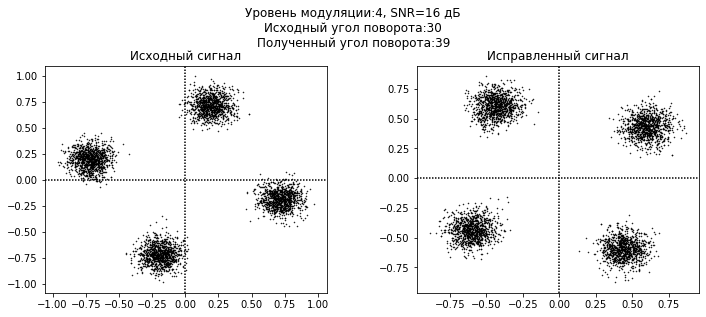

In [ ]:
M = 4
SNR = 16
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

angle = angle_corrector4(test)

test = test*np.exp(-angle/180*np.pi*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle}''')
fig.tight_layout(pad=5.0)

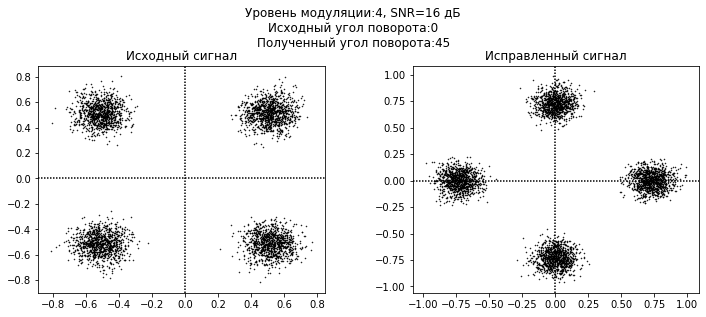

In [ ]:
M = 4
SNR = 16
Ph = 0
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

angle = angle_corrector4(test)

test = test*np.exp(-angle/180*np.pi*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle}''')
fig.tight_layout(pad=5.0)

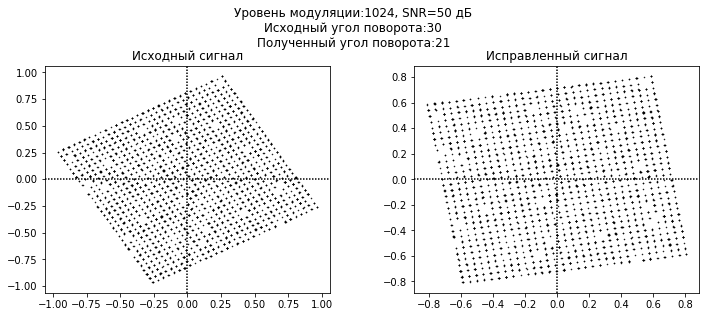

In [ ]:
M = 1024
SNR = 50
Ph = 30
test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[0].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)


ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

angle = angle_corrector4(test)

test = test*np.exp(-angle/180*np.pi*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)
ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle}''')
fig.tight_layout(pad=5.0)

## Надеюсь еще один алгоритм 

(array([-0.108, -0.095, -0.015,  0.009]),
 -0.052250000000000005,
 0.05018652707649734)

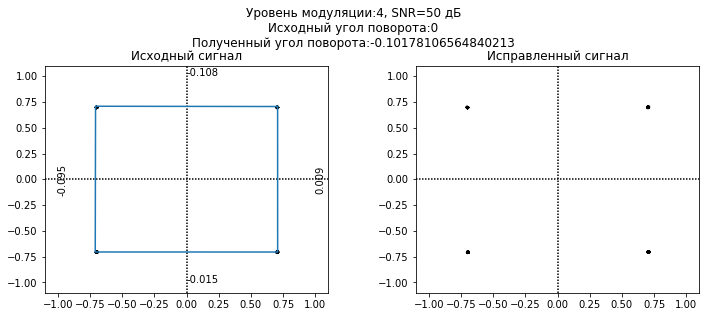

### Тестирование методов

In [ ]:
method_test = df[:]

In [194]:
def angle_corrector1(QAM_cons):
  
  max_1 = 0 + 0j
  max_2 = 0 + 0j

  for i in QAM_cons:
    if i.real >= 0 and i.imag >= 0:
      if abs(max_1) < abs(i):
        max_1 = i
    elif i.real < 0 and i.imag > 0:     
      if abs(max_2) < abs(i):
        max_2 = i

  tops = np.array([[max_1.real, max_1.imag],
                  [max_2.real, max_2.imag]])
  
  angle = np.arctan((tops[0][0] - tops[0][1])/(tops[1][0] - tops[1][1]))
  if angle < 0:
    angle = np.pi/2 + angle
  return angle*180/np.pi

In [ ]:
def angle_corrector2(QAM_cons):

  quarter_1 = np.array([i for i in QAM_cons if i.real >= 0 and i.imag >= 0])
  quarter_2 = np.array([i for i in QAM_cons if i.real <= 0 and i.imag >= 0])

  tops = [[np.mean(quarter_1.real), np.mean(quarter_1.imag)], 
          [np.mean(quarter_2.real), np.mean(quarter_2.imag)]]

  angle = np.arctan((tops[0][0] - tops[0][1])/(tops[1][0] - tops[1][1]))

  if angle < 0:
    angle = np.pi/2 + angle

  return angle*180/np.pi

In [ ]:
def angle_corrector3(QAM_cons):

  max_1 = 0 + 0j
  max_2 = 0 + 0j

  for i in QAM_cons:
    if i.real >= 0 and i.imag >= 0:
      if max_1.imag < i.imag:
        max_1 = i
    elif i.real < 0 and i.imag > 0:     
      if max_2.real > i.real:
        max_2 = i

  tops = np.array([[max_1.real, max_1.imag],
                    [max_2.real, max_2.imag]])
    
  angle = np.arctan((tops[0][0] - tops[0][1])/(tops[1][0] - tops[1][1]))
  
  return angle*180/np.pi

In [ ]:
def return_closest(n):
  return min(table, key=lambda x:abs(x-n))

def angle_corrector4(qam):
  angle_mean = np.mean(np.angle(qam))
  return table[table == return_closest(angle_mean)].index[0]

In [ ]:
%time method_test['1_corrector'] = method_test.QAM_symbols.apply(angle_corrector1)

%time method_test['2_corrector'] = method_test.QAM_symbols.apply(angle_corrector2)

%time method_test['3_corrector'] = method_test.QAM_symbols.apply(angle_corrector3)

%time method_test['4_corrector'] = method_test.QAM_symbols.apply(angle_corrector4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 1min 13s, sys: 131 ms, total: 1min 13s
Wall time: 1min 13s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 1min 18s, sys: 182 ms, total: 1min 18s
Wall time: 1min 18s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 1min 14s, sys: 143 ms, total: 1min 14s
Wall time: 1min 14s
CPU times: user 6.32 s, sys: 13 ms, total: 6.34 s
Wall time: 6.32 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
method_test

,M,SNR,Phase_shift,QAM_symbols,1_corrector,2_corrector,3_corrector,4_corrector
1,4,50,0,"[(0.7014392993075365-0.6989112769319755j), (0....",89.921630,0.002345,0.338061,87
2,4,50,0,"[(-0.7067526946873619-0.6995223913305271j), (0...",89.843632,89.999032,0.261394,3
3,4,50,0,"[(-0.6996921958171798+0.7009840192354847j), (-...",89.919363,89.996476,0.369531,90
4,4,50,3,"[(-0.7398838731040926+0.664625874417456j), (0....",3.049988,3.010719,3.256185,6
5,4,50,3,"[(0.739909895597325-0.6611057921027184j), (0.6...",2.862477,2.995955,3.235688,12
...,...,...,...,...,...,...,...,...
12086,1024,0,87,"[(0.18522224139101126+0.15108979133587475j), (...",87.236129,89.988858,17.951621,87
12087,1024,0,87,"[(-0.22127741229059017+0.07121604374153466j), ...",18.705509,89.879482,23.767743,3
12088,1024,0,90,"[(-0.40020864490078795-0.18589912117816118j), ...",60.505396,0.477041,22.561033,84
12089,1024,0,90,"[(-0.3619966950003602+0.04947952938787332j), (...",33.766262,89.776861,35.165747,3


In [ ]:
(method_test.Phase_shift - method_test['1_corrector']).apply(np.abs).mean()

8.076613754110088

In [ ]:
(method_test.Phase_shift - method_test['2_corrector']).apply(np.abs).mean()

19.21394206284075

In [ ]:
(method_test.Phase_shift - method_test['3_corrector']).apply(np.abs).mean()

21.709129245738744

In [ ]:
(method_test.Phase_shift - method_test['4_corrector']).apply(np.abs).mean()

20.875682382133995

## Модернизация метода вычисление угла поворота по значениям с наибольшим модулем в 1-ой и 2-ой четверти

(array([-36.115, -35.989, -35.98 , -36.038]),
 -36.0305,
 0.05354670858232286,
 0.013345361497736146)

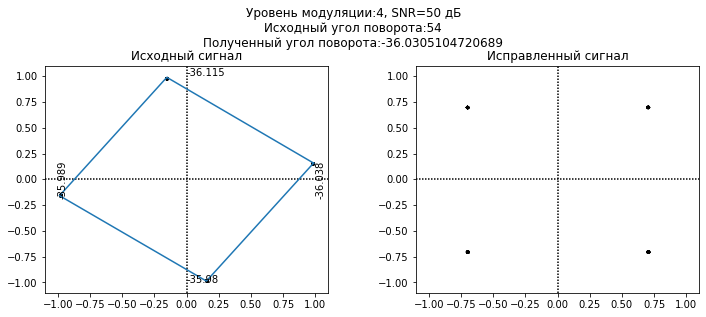

In [171]:
M = 4
SNR = 50
Ph = 54

test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[1].QAM_symbols

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(11, 5)

max_1 = 0 + 0j
max_2 = 0 + 0j
max_3 = 0 + 0j
max_4 = 0 + 0j

for i in test:
  if i.real >= 0 and i.imag >= 0:
    if abs(max_1) < abs(i):
      max_1 = i
  elif i.real < 0 and i.imag > 0:     
    if abs(max_2) < abs(i):
      max_2 = i
  elif i.real < 0 and i.imag < 0:     
    if abs(max_3) < abs(i):
      max_3 = i
  elif i.real > 0 and i.imag < 0:     
    if abs(max_4) < abs(i):
      max_4 = i

tops = np.array([[max_1.real, max_2.real, max_3.real, max_4.real, max_1.real],
                [max_1.imag, max_2.imag, max_3.imag, max_4.imag, max_1.imag]])

angles = np.array([np.arctan((max_2.imag - max_1.imag)/(max_2.real - max_1.real))*180/np.pi,
                   -np.arctan((max_3.real - max_2.real)/(max_3.imag - max_2.imag))*180/np.pi,
                   np.arctan((max_4.imag - max_3.imag)/(max_4.real - max_3.real))*180/np.pi,
                   -np.arctan((max_1.real - max_4.real)/(max_1.imag - max_4.imag))*180/np.pi])

angles_border = np.std(angles)/4

angles_sign = 1 if np.mean(angles) > 0 else -1

angle = np.mean([abs(i)*angles_sign for i in angles if abs(i) > angles_border])

ax1.set_title('Исходный сигнал')
ax1.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax1.axhline(0, c='black', dashes=(1, 1))
ax1.axvline(0, c='black', dashes=(1, 1))

ax1.plot(tops[0], tops[1])

ax1.scatter([0, -1, 0, 1], 
            [1, 0, -1, 0],
            c='white',
            marker='.',
            s=1)

angles = np.round(angles, decimals=3)

ax1.text(0, 1, angles[0])
ax1.text(-1, 0, angles[1], rotation=90, verticalalignment='center')
ax1.text(0, -1, angles[2])
ax1.text(1, 0, angles[3], rotation=90, verticalalignment='center')

test = test*np.exp(-angle/180*np.pi*1j)

ax2.set_title('Исправленный сигнал')
ax2.scatter(test.real, 
            test.imag,
            c='black',
            marker='.',
            s=1)

ax2.scatter([0, -1, 0, 1], 
            [1, 0, -1, 0],
            c='white',
            marker='.',
            s=1)

ax2.axhline(0, c='black', dashes=(1, 1))
ax2.axvline(0, c='black', dashes=(1, 1))
fig.suptitle(f'''Уровень модуляции:{M}, SNR={SNR} дБ
Исходный угол поворота:{Ph}
Полученный угол поворота:{angle}''')
fig.tight_layout(pad=5.0)

angles, np.mean(angles), np.std(angles), angles_border

In [169]:
def angle_corrector1_1(qam):
  max_1 = 0 + 0j
  max_2 = 0 + 0j
  max_3 = 0 + 0j
  max_4 = 0 + 0j

  for i in qam:
    if i.real >= 0 and i.imag >= 0:
      if abs(max_1) < abs(i):
        max_1 = i
    elif i.real < 0 and i.imag > 0:     
      if abs(max_2) < abs(i):
        max_2 = i
    elif i.real < 0 and i.imag < 0:     
      if abs(max_3) < abs(i):
        max_3 = i
    elif i.real > 0 and i.imag < 0:     
      if abs(max_4) < abs(i):
        max_4 = i

  angles = np.array([np.arctan((max_2.imag - max_1.imag)/(max_2.real - max_1.real))*180/np.pi,
                    -np.arctan((max_3.real - max_2.real)/(max_3.imag - max_2.imag))*180/np.pi,
                    np.arctan((max_4.imag - max_3.imag)/(max_4.real - max_3.real))*180/np.pi,
                    -np.arctan((max_1.real - max_4.real)/(max_1.imag - max_4.imag))*180/np.pi])

  angles_border = np.std(angles)/4

  angles_sign = 1 if np.mean(angles) > 0 else -1

  angle = np.mean([abs(i)*angles_sign for i in angles if abs(i) > angles_border])
 

  return angle

In [175]:
method_test = df[:]
%time method_test['answer'] = method_test.QAM_symbols.apply(angle_corrector1_1)

CPU times: user 1min 51s, sys: 228 ms, total: 1min 52s
Wall time: 1min 52s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
method_test = method_test.drop('QAM_symbols', axis=1)
method_test

,M,SNR,Phase_shift,answer
1,4,50,0,-0.072973
2,4,50,0,-0.148344
3,4,50,0,0.111420
4,4,50,3,2.985125
5,4,50,3,2.951871
...,...,...,...,...
12086,1024,0,87,-9.943419
12087,1024,0,87,-7.058233
12088,1024,0,90,-11.761052
12089,1024,0,90,-9.370430


In [177]:
(method_test.Phase_shift - method_test['answer']).apply(np.abs).mean()

45.854873931980826

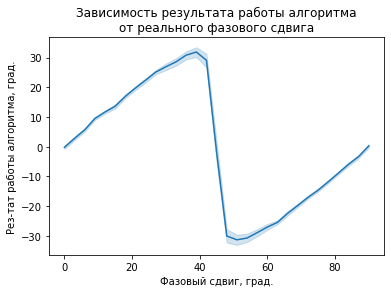

In [205]:
sns.lineplot(x='Phase_shift', 
                y='answer',
                data=method_test).set(title='Зависимость результата работы алгоритма\nот реального фазового сдвига',
                                      ylabel='Рез-тат работы алгоритма, град.',
                                      xlabel='Фазовый сдвиг, град.')
plt.show()

In [184]:
method_test['Phase_correct'] = method_test.Phase_shift
method_test.loc[method_test.Phase_shift > 45, 'Phase_correct'] = 90 - method_test.Phase_shift
method_test['answer_correct'] = method_test.answer.apply(np.abs)

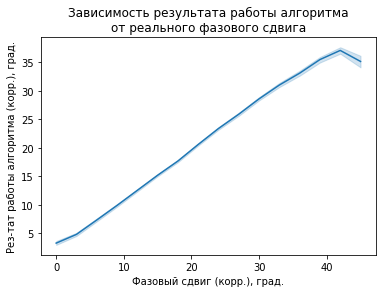

In [206]:
sns.lineplot(x='Phase_correct', 
                y='answer_correct',
                data=method_test)\
                .set(title='Зависимость результата работы алгоритма\nот реального фазового сдвига',
                      ylabel='Рез-тат работы алгоритма (корр.), град.',
                      xlabel='Фазовый сдвиг (корр.), град.')
plt.show()

In [186]:
(method_test.Phase_correct - method_test['answer_correct']).apply(np.abs).mean()

2.702543644069472

In [187]:
(method_test.Phase_correct - method_test['answer_correct']).apply(np.abs).std()

5.0259788733845

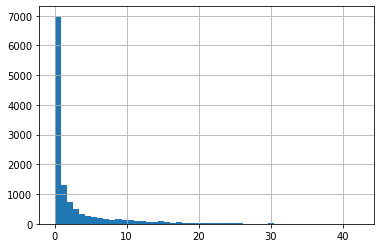

In [191]:
(method_test.Phase_correct - method_test['answer_correct']).apply(np.abs).hist(bins=50)

In [192]:
M = 4
SNR = 50
Ph = 54

test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[1].QAM_symbols

%timeit angle_corrector1_1(test)

100 loops, best of 5: 9.17 ms per loop


In [195]:
M = 4
SNR = 50
Ph = 54

test = df[(df.M == M) & 
          (df.SNR == SNR) & 
          (df.Phase_shift == Ph)] \
          .iloc[1].QAM_symbols

%timeit angle_corrector1(test)

100 loops, best of 5: 6.13 ms per loop


In [207]:
method_test['error'] = (method_test.Phase_correct - method_test['answer_correct']).apply(np.abs)

In [215]:
method_test.drop(['Phase_shift', 
                  'answer', 
                  'Phase_correct', 
                  'answer_correct', 'M'], axis=1)\
.groupby('SNR', as_index=False).mean().sort_values('error', ascending=False).head(5)

,SNR,error
0,0,10.463238
1,2,9.798164
2,4,9.065024
3,6,7.552024
4,8,6.076751


In [216]:
method_test.drop(['SNR', 
                  'answer', 
                  'Phase_correct', 
                  'answer_correct', 'M'], axis=1)\
.groupby('Phase_shift', as_index=False).mean().sort_values('error', ascending=False).head(5)

,Phase_shift,error
15,45,10.647427
14,42,5.467429
16,48,4.985674
17,51,4.035089
13,39,3.892984
